# Homework 4 (Due on Blackboard before class on Tue. 2/6)

You must use Jupyter notebook to complete homework 4 and submit it as a .ipynb file on Blackboard. This is to have you practice writing notebooks using markdown and code. For a tutorial on markdown, see: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. If you use code to solve for the final answer, please give your answer as part of a print statement that explains what the number means. Example: `print('Probability that X=5 is', prob)`. See these tutorials for how to nicely format output: https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3 and https://www.programiz.com/python-programming/methods/string/format.

**Note: The math formula used in writing some of the solutions uses a format called Latex, which makes for pretty display. you are not expected to learn Latex for this course. You could have written out the solutions in plain ascii text.**


## Question 1
(DMD Exercise 2.22) This question begins with the text "A large retail company has stores at two locations in a city..." To solve this question, you would have to use the formula in DMD Section 2.11.

**Solution:**

Let $U_1$ and $U_2$ be random variables representing the sale of umbrella at each venue. According to the question, the mean and standard deviations are
$$E(U_1)=147.8 \quad \sigma(U_1)=51.0$$
$$E(U_2)=63.2 \quad \sigma(U_2)=37.0$$

Let $R$ be the total revenue, we have $R=17U_1+9U_2$. Using the formula in DMD section 2.11, we have
$$E(R)=17E(U_1)+9E(U_2),$$
$$COV(U_1,U_2)=CORR(U_1,U_2)\sigma(U_1)\sigma(U_2),$$
$$VAR(R)=17^2VAR(U_1)+9^2VAR(U_2)+2(17)(9)COV(U_1,U_2),$$
$$\sigma(R)=\sqrt{VAR(R)}.$$

The numerical values are as in the following Python code.

In [13]:
import numpy as np
E_R=17*147.8+9*51.0
cov_R=0.7*51*37
var_R=17**2*(51.0)**2+9**2*(37)**2+2*17*9*cov_R
sigma_R=np.sqrt(var_R)
print('The mean of total revenue is {0:.2f}, variance is {1:.2f} and standard deviation is {2:.2f}'.format(E_R,var_R,sigma_R))

The mean of total revenue is 2971.60, variance is 1266773.40 and standard deviation is 1125.51


## Question 2
(DMD Exercise 2.25) This question begins with the text "Suppose a fraction 5% of the microchips produced by a leading microchip manufacturer are defective."

**Solution:**

**a)** The probability that each chip is not defective is $0.95$. Therefore, the probability that all 10 microchips are not defective is $(0.95)^10 \approx 60\%$.
**b)** Let $D$ denote the event that the chip is defective and $A$ the event that the inspector accepts. Let $D'$ denote the probability that it is not defective.

\begin{align} P(A) &=P(A|D)P(D) + P(A|D')P(D')\\
&= (0.1)(0.05)+(1)(0.95) \\
&= 95.5\% 
\end{align}

**c)** The number of chips the inspector accepts, call it $X$, is governed by a binomial distribution with $n=10$ and $p=0.955$. The probabiliy that this is equal to 9 exactly can be determined either by the formula for the binomial distribution in the book (see section 2.6), or by the following Python command.

In [14]:
from scipy.stats import binom
X=binom(n=10,p=0.955)
print('Probability inspector accepts exactly 9 chips is, ',X.pmf(9))

Probability inspector accepts exactly 9 chips is,  0.297332825589


**d)** This is a standard Bayes rule application:

$P(D'|A)=P(D' \& A)/P(A)=P(A|D')P(D')/P(A)=(1)(0.95)/0.955 \approx 99.5\%$.

**e)** The probability of no defect conditional on acceptance is $\frac{0.95}{0.955}$, as given above. Since defect and acceptance of each machine is independent of another, the desired probability is 
$(\frac{0.95}{0.955})^{10} \approx 95\%.$

## Question 3
(DMD Exercise 2.27) This question begins with the text "In this exercise we examine the effects of overbooking in the airline industry."

**Solution:** The number of people who show up, say $X$, is governed by a binomial distribution with $n=11$ and $p=0.8$. 

**a)** The desired probability is given by the CDF, $P(X \le 5)$, which is evaluated below.

In [15]:
X=binom(11,0.8)
print('Probability at most 5 people show up is',X.cdf(5))

Probability at most 5 people show up is 0.01165420544


**b)** The desired probability is given by the PMF, $P(X = 10)$.

In [16]:
print('Probability exactly 10 people show up is',X.pmf(10))

Probability exactly 10 people show up is 0.23622320128


**c)** This question (and the next) implicitly assumes that the airline does not profit from a no-show.

Let $Y$ be the expected profit. Note that by the example given in the problem, the effective cost of the oversold ticket is $3000+1200=4200$, because we are refunding the original ticket, and incurring additional costs. Hence,

$$E(Y)=1200E(X)-4200P(X=11).$$

The value is given as below.

In [19]:
print('Expected profit is ${:.2f}.'.format(1200*X.mean()-4200*X.pmf(11)))

Expected profit is $10199.22.


**d)** Assuming again that the company does not profit from a no-show, then the binomial variable must be tweaked so that $n=10$. The expected profit is simply $1200E(X)$, which is

In [23]:
X=binom(10,0.8)
print('Expected profit is ${:.2f}.'.format(1200*X.mean()))

Expected profit is $9600.00.


**e)** When people travel in groups of two or more, then if one person does not show up, then it's very likely his/her traveling partner will also not show up. Therefore, the event a person shows up is not independent of the event the next person shows up.

## Question 4 
This question asks you to illustrate the Central Limit Theorem using Python plots.

**Solution:** The code for this problem is similar to what was done to illustrate the central limit theorem in the course notes to session 8: http://nbviewer.jupyter.org/github/pengshi-usc/usc-dso-570/blob/master/Course%20Notes/08-Simulation%20Modeling.ipynb For convenience, instead of plotting the pmf, we plot a histogram with a large number of samples. 

a) (Coding DMD Example 3.11 in Section 3.7) Create python code that plots the 3 plots in Figure 3.14.

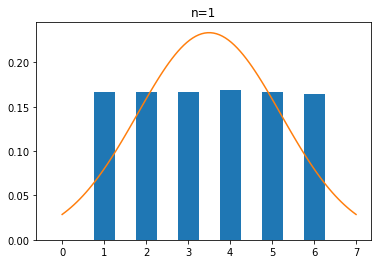

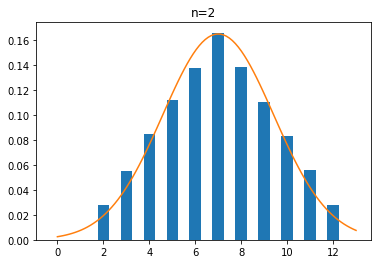

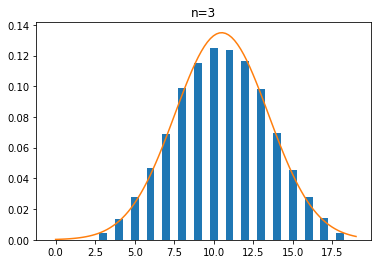

In [41]:
from scipy.stats import rv_discrete,norm
import numpy as np
import matplotlib.pyplot as plt
X=rv_discrete(values=([1,2,3,4,5,6],[1/6,1/6,1/6,1/6,1/6,1/6]))
for n in range(1,4):
    samples=sum(X.rvs(size=100000) for i in range(n)) # Compute a sample of the sum of n independent draws of X.
    plt.hist(samples,bins=range(n*6+2),density=True,rwidth=0.5,align='left') # plot the histogram
    
    # Plot the normal overlay.
    mean=X.mean()*n
    std=X.std()*np.sqrt(n)
    Y=norm(loc=mean,scale=std)
    values=np.linspace(0,n*6+1,100)
    plt.plot(values,Y.pdf(values))
    plt.title('n={}'.format(n))
    plt.show()

In [ ]:
b) (Coding DMD Example 3.12 in Section 3.7) Create python code that plots the 4 plots in Figure 3.15.

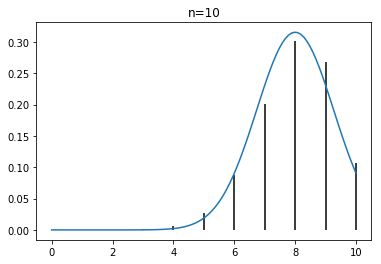

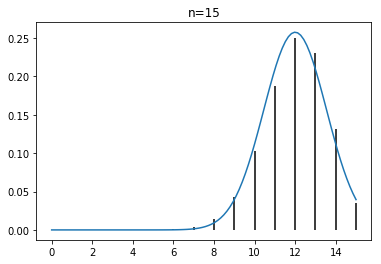

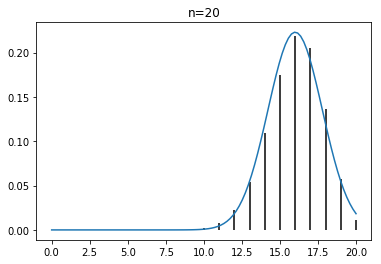

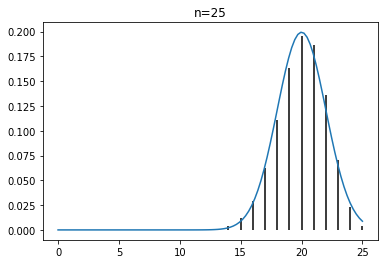

In [45]:
from scipy.stats import binom,norm
import matplotlib.pyplot as plt
import numpy as np
for n in [10,15,20,25]:
    X=binom(n,0.8)
    Y=norm(X.mean(),X.std())
    binomX=range(n+1)
    normX=np.linspace(0,n,100)
    plt.vlines(binomX,0,X.pmf(binomX))
    plt.plot(normX,Y.pdf(normX))
    plt.title('n='+str(n))
    plt.show()
    

## Question 5
(DMD Exercise 3.2) This question begins with the text "The men's 100 meter sprint at the 1996 Olympic Games..."

**Solution:**
**a)** 
Let $D$ be a random variable denoting Donovan Bailey's time, which is a uniformly random variable distributed between 9.75 and 9.95. This question asks for $P(D<9.86)$, which exactly the CDF. You can either use the formula in the book in DMD 3.3, or the following Python code.

In [48]:
from scipy.stats import uniform
D=uniform(loc=9.75,scale=9.95-9.75)
print('Probability that Donovan Bailey beats the previous record is,',D.cdf(9.86))

Probability that Donovan Bailey beats the previous record is, 0.55


**b)** The probability that each person doesn't beat the previous record is $1-0.55=0.45$. The probability that all three don't beat the record is $0.45^3=0.091$. So the probability that one of them beats the record is $1-0.091 \approx 91\%$.

**c)** The independence assumption may not be valid because runners lagging behind the leader will try to catch
up and so, their speed will depend on the speed of the leader. Another reason is that whether or stadium conditions affect all runners at the same time.

## Question 6
(DMD Exercise 3.6) This question begins with the text "Winter lasts from December 21 through March 21..."

**Solution:**
**a)** Let $B$ be the average winter temperature in Boston. This is normally distributed, and the probability it is above freezing is simply 1 minus the CDF, $P(B>32)=1-P(B<=32)$, which is as below.

In [50]:
from scipy.stats import norm
B=norm(32.5,1.59)
print('Probability temperature above freezing is',1-B.cdf(32))

Probability temperature above freezing is 0.623416207682


**b)** Based on DMD section 3.6, the difference of two normally distributed random variables is also normally distributed. Let $N$ be the temperature in New York, and $D=N-B$ be the difference. We would like the probability $P(N\le B)=P(D \le 0)$, so it suffices to find the CDF of D. Using the formula in DMD section 3.6,

$$E(D)=E(N)-E(B),$$
$$\sigma(D)=\sqrt{\sigma(N)^2+\sigma(B)^2}.$$

The final answer is below.

In [52]:
E_D=35.4-32.5
sigma_D=np.sqrt(1.59**2+2.05**2)
D=norm(E_D,sigma_D)
print('Probability that average winter temperature in New York is smaller than in Boston is',D.cdf(0))

Probability that average winter temperature in New York is smaller than in Boston is 0.131822361368


**c)** The independence assumption might not be reasonable given that the two cities are close
enough as to be influenced by the same weather systems.

## Question 7
(DMD Exercise 3.12) This question begins with the text "A portfolio manager believes that tomorrow's foreign exchange rate of German marks per U.S. dollar will be Normally distributed..."

**Solution:** All of the results are based on the CDF of the random variable $X$. For part a), $P(X\ge 2.08)=1-P(X\le 2.08).$ For part b), the probability is exactly the CDF $P(X\le 1.85)$. For part c), the probability is the difference of CDFs, $P(2.00 \le X \le 2.20)=P(X \le 2.20)-P(X \le 2.00)$. The numerical answers are below.

In [53]:
X=norm(2.03,0.08)
print('Probability tomorrow\'s rate is above 2.08:',1-X.cdf(2.08))
print('Probability the rate is below 1.85:',X.cdf(1.85))
print('Probability the rate is between 2.00 and 2.20:',X.cdf(2.2)-X.cdf(2))

Probability tomorrow's rate is above 2.08: 0.265985529049
Probability the rate is below 1.85: 0.012224472655
Probability the rate is between 2.00 and 2.20: 0.629376460224


## Question 8
(DMD Exercise 3.18) This question begins with the text "In 1996, after an extensive investigation by the Consumer Product Safety Commission..."

**Solution:** 
**a)** There are two assumptions: 

1. Whether a car has a faulty electrical wiring is independent of another car having a faulty electrical wiring, and 

2. The probability that a given car has a faulty electrical wiring is the same for each car in the sample. 

These assumptions appear to be reasonable and, unless there is a consistent error in the production process of this type of car, or the number of cars found with the problem in a random sample should be binomially distributed.

**b)** This is the probability that a binomially distributed random variable with $n=2000$ and $p=0.30$ is less than or equal to 5. This is a very small probability as seen in the following CDF calculation.

In [54]:
X=binom(n=2000,p=0.3)
print('Probability of finding 5 or fewer faulty cars if p=0.3 is',X.cdf(5))

Probability of finding 5 or fewer faulty cars if p=0.3 is 6.06086539957e-298


Note that e-298 means $10^{-298}$, which means there is 297 zeros after the decimal place, before the leading 6! Hence the probability is practically zero.

Alternatively, you can do the Normal approximation, with $\mu=2000*0.3=600$ and $\sigma=\sqrt{np(1-p)}=\sqrt{(2000)(0.3)(0.7)}\approx 20.5$. Hence, we are looking at a $(600-5)/20.5 \approx 29$ standard deviation event, which also has practically zero probability. The exact probability is as below.


In [55]:
Y=norm(600,np.sqrt(420))
print('Probability of finding 5 or fewer faculty cars by normal approximation is',Y.cdf(5))

Probability of finding 5 or fewer faculty cars by normal approximation is 1.26030458861e-185



**c)** According to (b), it is not likely that the true proportion of cars having the problem is 0.30.

## Question 9
Choose one continuous probability distribution and one discrete probability distribution in the `scipy.stats` library that we didn't discuss in class. See the scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

For each of the two distributions, read the documentation above and Wikipedia the distribution. Then describe one example in your life or in your future career in which this distribution may be used to model an uncertainty. (If you can't find an example, choose another distribution.) Illustrate each application using reasonable parameters you choose, and plot the PMF or PDF of the distribution as well as a histogram of 100 samples. Write one sentence to summarize an insight from looking at the histogram or the PMF/PDF that may be helpful for the application you chose.

**Sample Solution:**

The Skellam distribution is a discrete distribution not discussed in class. According to Wikipedia, it is the difference of two independent Poisson distributions. One type of uncertainty modeled is the difference between how many people come to my office hours on two different weeks (this assumes that the number of people who come is Poisson distributed and independent across weeks). Suppose that on a week with a difficult topic, the expected number of people who come is $\mu_1=6$, while on a nother week, the expected number is $\mu_2=3$. The following three plots gives the PMF, a histogram of 100 samples, and the CDF of the distribution of how many more people come the first week compared to the second. One insight from looking at the PMF is that it looks approximately like a Bell curve, and there is a significant probability (20 percent) that fewer people come in the more difficult week than the easier week.

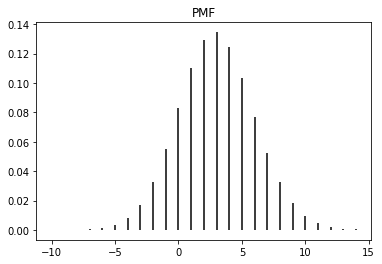

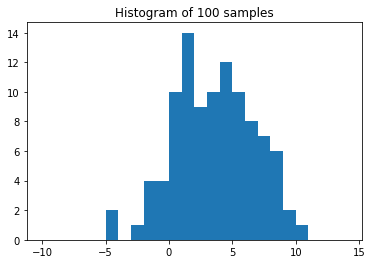

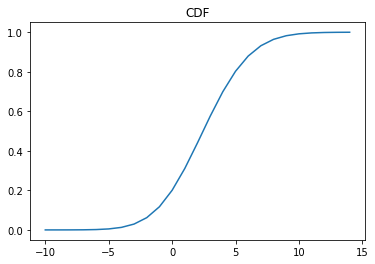

Probability fewer people come in more difficult week is 0.200343549159


In [2]:
from scipy.stats import skellam
import numpy as np
import matplotlib.pyplot as plt
diff=skellam(mu1=6,mu2=3)
xaxis=np.arange(-10,15)
plt.vlines(xaxis,0,diff.pmf(xaxis))
plt.title('PMF')
plt.show()
plt.hist(diff.rvs(size=100),bins=xaxis)
plt.title('Histogram of 100 samples')
plt.show()
plt.plot(xaxis,diff.cdf(xaxis))
plt.title('CDF')
plt.show()
print('Probability fewer people come in more difficult week is',diff.cdf(0))

The Pareto distribution is a continuous distribution not discussed in class. According to Wikipedia, this distribution is used to model highly skewed situations. For example, the majority of wealth in society is held by a small minority of people. This distribution is also used to describe the 80/20 rule: 80% of the time is spent on 20% of the tasks. This distribution may be accurate to describe the time spent on a research project (as a minority of projects may end up taking the majority of time). Let $T$ be time needed on a research project, and let the shape parameter $b=1$ (this is one of the parameters of the Pareto distribution.) Suppose the minimum time is zero and the scale is 1. Then the distribution of how many years needed for a research project is displayed in the below graphs. One insight is if I do many projects, that it is normal for a few projects to take 8 or more years, even though the vast majority of projects take less than 2 years.

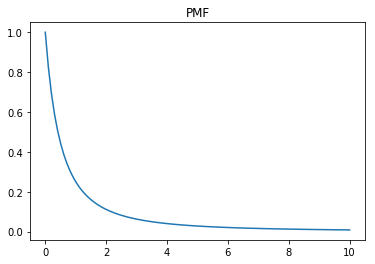

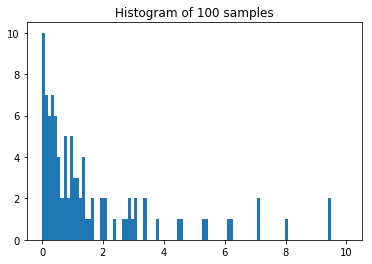

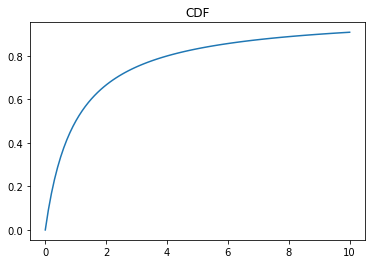

In [7]:
from scipy.stats import pareto
import numpy as np
import matplotlib.pyplot as plt
T=pareto(loc=-1,scale=1,b=1)
xaxis=np.linspace(0,10,100)
plt.plot(xaxis,T.pdf(xaxis))
plt.title('PMF')
plt.show()
plt.hist(T.rvs(size=100),bins=xaxis)
plt.title('Histogram of 100 samples')
plt.show()
plt.plot(xaxis,T.cdf(xaxis))
plt.title('CDF')
plt.show()